# Analyzing Personality Confidence 🌊

With the results obtained from processing the **Persona-Predict V2** 🧠  model's data, we analyze the **confidence** 🔍 level of the generated inferences.

If the graphics are not rendered 🚫, use the address:

  - [View in NBViewer](https://nbviewer.org/github/NeuroQuestAi/neuroquest-examples/blob/main/products/persona-predict/notebooks/Persona-Predict-Pop-Conf-PT-BR.ipynb?flush_cache=true)

For more information 🔍 about the service visit: [docs.neuroquest.ai/persona-predict](https://docs.neuroquest.ai/persona-predict/)

In [1]:
import pandas as pd
import plotly.express as px
import utility as U

pd.set_option("display.max_rows", 50)  
pd.set_option("display.max_columns", 10)

## Read Data 📊

In [2]:
df = pd.DataFrame(U.get_confidence_from_batch_json_results())
df.head(5)

Number of JSON files found: 100


,openness,imagination,artistic_interests,emotionality,adventurousness,...,anger,depression,self_consciousness,immoderation,vulnerability
0,98.653697,98.673785,98.597485,98.697211,98.587847,...,84.044462,96.272598,96.635103,95.732040,83.973929
1,98.700371,98.664614,98.669086,98.761595,98.641419,...,97.046155,97.179182,97.351004,97.001778,97.554065
2,98.499742,98.481651,98.449372,98.575498,98.424727,...,83.643998,95.266382,95.818479,94.237987,83.642250
3,98.224483,98.234587,98.169186,98.337548,98.091162,...,83.873717,95.895847,96.233761,95.414103,88.393212
4,98.709911,98.681604,98.662501,98.764389,98.675674,...,95.947551,95.428665,95.944638,94.664929,96.591303


## Model Confidences 🔍

### Confidence Profile 

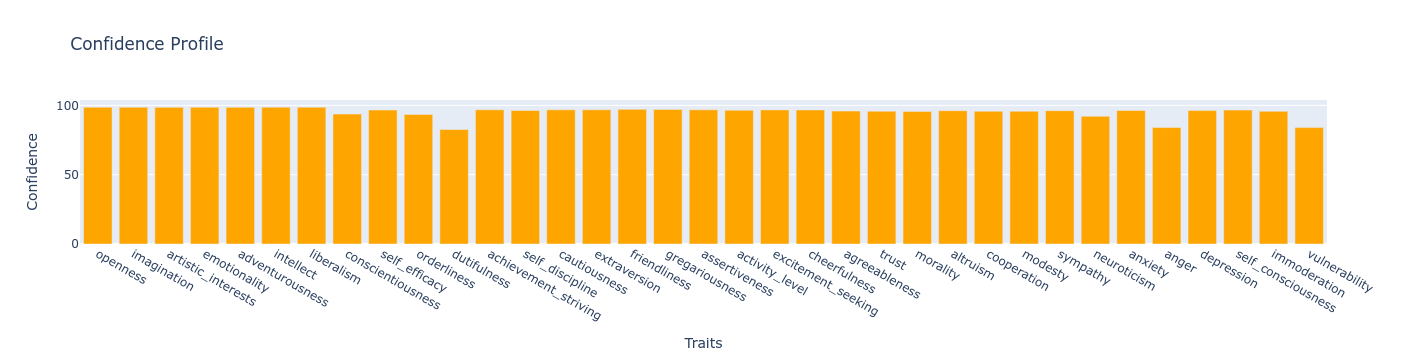

In [3]:
individual_profile = df.loc[0]
individual_profile_df = individual_profile.reset_index()
individual_profile_df.columns = ["Trait", "Confidence"]

fig = px.bar(
    individual_profile_df,
    x="Trait",
    y="Confidence",
    title="Confidence Profile",
    labels={"Trait": "Traits", "Confidence": "Confidence"},
    color_discrete_sequence=["orange"],
)

fig.show()

### Trait Average 

In [4]:
df.mean()

openness                98.421175
imagination             98.436090
artistic_interests      98.358375
emotionality            98.487624
adventurousness         98.331304
intellect               98.458102
liberalism              98.455556
conscientiousness       95.983748
self_efficacy           97.355165
orderliness             95.344595
dutifulness             91.132118
achievement_striving    97.443105
self_discipline         97.260570
cautiousness            97.366932
extraversion            97.343939
friendliness            97.539670
gregariousness          97.605685
assertiveness           97.239005
activity_level          97.055173
excitement_seeking      97.376910
cheerfulness            97.247193
agreeableness           96.235994
trust                   96.309773
morality                95.867731
altruism                96.419750
cooperation             96.095152
modesty                 96.188476
sympathy                96.535085
neuroticism             94.290441
anxiety       

 ### Standard Deviation

In [5]:
df.std()

openness                0.226933
imagination             0.208268
artistic_interests      0.238890
emotionality            0.214625
adventurousness         0.257452
intellect               0.223843
liberalism              0.228362
conscientiousness       2.025610
self_efficacy           0.595769
orderliness             3.748455
dutifulness             7.084852
achievement_striving    0.568733
self_discipline         0.718930
cautiousness            0.591717
extraversion            0.417649
friendliness            0.391021
gregariousness          0.385863
assertiveness           0.409389
activity_level          0.493844
excitement_seeking      0.448117
cheerfulness            0.411034
agreeableness           0.872309
trust                   0.881254
morality                1.112922
altruism                0.823832
cooperation             0.876773
modesty                 0.927900
sympathy                0.670534
neuroticism             3.872677
anxiety                 2.692542
anger     

### Ranges

In [6]:
df.agg(["min", "max", "median"])

,openness,imagination,artistic_interests,emotionality,adventurousness,...,anger,depression,self_consciousness,immoderation,vulnerability
min,97.879749,97.947995,97.785630,97.991991,97.636300,...,81.471548,80.934772,82.574597,71.759203,73.878037
max,98.872123,98.842275,98.849618,98.896184,98.852075,...,97.916093,98.070079,98.142550,97.950787,98.079054
median,98.440994,98.477165,98.377252,98.520188,98.367463,...,95.285144,96.296428,96.674314,96.004015,96.357910


### Outliers

In [7]:
df[df < 90].dropna(how='all', axis=1)

,conscientiousness,orderliness,dutifulness,neuroticism,anxiety,anger,depression,self_consciousness,immoderation,vulnerability
0,NaN,NaN,82.622785,NaN,NaN,84.044462,NaN,NaN,NaN,83.973929
1,NaN,NaN,88.620105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,83.643998,NaN,NaN,NaN,83.642250
3,NaN,NaN,NaN,NaN,NaN,83.873717,NaN,NaN,NaN,88.393212
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,87.84473,NaN,83.295177,NaN,NaN,81.719806,82.994574
96,NaN,82.49394,80.461310,NaN,NaN,83.968411,NaN,NaN,NaN,83.607766
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation Matrix

In [8]:
df.corr().T

,openness,imagination,artistic_interests,emotionality,adventurousness,...,anger,depression,self_consciousness,immoderation,vulnerability
openness,1.000000,0.994221,0.991124,0.995111,0.994899,...,0.042829,0.025541,0.082149,0.150447,0.061415
imagination,0.994221,1.000000,0.976200,0.986520,0.984973,...,0.070716,0.054426,0.111451,0.176177,0.085121
artistic_interests,0.991124,0.976200,1.000000,0.989110,0.986060,...,0.014261,-0.005892,0.044610,0.121833,0.027660
emotionality,0.995111,0.986520,0.989110,1.000000,0.985947,...,0.027752,0.011129,0.068736,0.135550,0.049738
adventurousness,0.994899,0.984973,0.986060,0.985947,1.000000,...,0.049447,0.020423,0.080962,0.150393,0.068359
intellect,0.989755,0.988364,0.972884,0.986457,0.978509,...,0.051113,0.050131,0.104109,0.172219,0.073269
liberalism,0.991839,0.988348,0.978208,0.980549,0.989038,...,0.044025,0.026190,0.083573,0.143153,0.063986
conscientiousness,-0.048448,-0.044148,-0.059095,-0.050854,-0.035624,...,-0.069356,-0.112839,-0.093839,-0.145198,-0.093623
self_efficacy,-0.187753,-0.182245,-0.188382,-0.189568,-0.173344,...,-0.074470,-0.094346,-0.104092,-0.138873,-0.106089
orderliness,-0.080908,-0.078334,-0.084548,-0.083189,-0.071842,...,-0.094340,-0.157327,-0.152199,-0.174151,-0.136565
